# Project 2025 - VideoGamesSales


## Task of project:

_The goal of the project is to conduct an exploratory analysis of video game sales data to identify key trends and patterns such as:_

- _most popular genres, platforms and publishers_

- _market behavior by year_

- _differences in sales by region_

- _characteristics of players preferences._

## Project Work-Plan:

<div style="border: 2px solid #333; padding: 15px; border-radius: 10px;">
    
**1. Collecting and loading data:**

- Loading the 'data.csv' dataset.

- Cleaning the dataset from unnecessary data

- Defining the data structure and variable types.

**2. Processing data for further analysis:**

- Checking data for missing values/incorrect , and remove them
  
- Transform datatype

**3. Data analysis**

1. Analysis of sales in regions

- Finding the largest sales in regions

- Finding the overall sales in regions

2. Analysis of the most profitable genres and platforms in dataset

- Finding the top-seller genre

- Finding the top-seller platform in dataset


**4. Visualization**

- `Scatter plot`: Game Sales trends by year + conclusions

- `Histogram`: Sales distribution by games + conclusions

- `Horizontal bar chart`: The Most profitable platforms + conclusions

- `Bar chart`: The Most popular genres + conclusions


- `Bar chart`: Top-10 Publishers + conclusions

- `Horizontal bar chart`: Genres distribution by Publishers + conclusion

**5. General Conclusions and recommendation**

- General trends by genres, platforms and regions

- Peculiarities of market behavior by years

- Practical advice for developers, publishers and investors


</div>


In [3]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Data import
df = pd.read_csv("data.csv")
df = df.drop(['Rank'] , axis = 1) #Removing 1 unnecessary column

In [5]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [7]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


# Column analysis based on Descriptive Statistics:
- `Year`: The Year column contains 16327 records, while the other columns contain 16598, which may indicate that in 271 cases there is no information about the year of manufacture, need to check the Column for missing values, and fill in/delete
  
- `NA_Sales`: Check the column for abnormal outliers, as well as check the distribution of sales and determine which games made the main cash

  
- `EU_Sales`: Need to compare the column with NA_Sales what genres or platforms are more popular in Europe. Are there any zero values that should be processed

  
- `JP_Sales`: Need to see which platforms are dominant and whether there are any strong differences between regions

  
- `Other_Sales`: It is necessary to determine which regions are included in this column, and also to study the dependence on global sales

  
- `Global_Sales`: Check the correlation with regional sales. Find out which games sell well everywhere, and which are popular only in certain regions

In [8]:
df.dtypes

Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Analysis of Column Type
- `Column Name` : Name of the Game(-s) , "object" type so correct. Need to check for duplicates
  
- `Platform` : Name of Platform where the games were released, "object" type , correct as well.

   
- `Year` : Year when games were published , type is "float64" which incorrect, year can't be float values, needed to be convert into integer values.

  
- `Genre`: Genre of Games(Platform,Sports,Racing,etc.) , "object" type correct.

  
- `Publisher`: Publisher of the game , "object" type correct.

  
- `NA_Sales`: Sales in NA regiom , "float64" correct

  
- `EU_Sales`: Sales in EU , "float64" dtype is valid

  
- `JP_Sales`: Sales in Japan , "float64" valid

  
- `Other_Sales`: Sales in other regions , "float64" is valid as for other regions

  
- `Global_Sales`: Worldwide sales , "fload64" is correct

In [9]:
df.isnull().sum() # Checking for missing values

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
missing_values = df.loc[df['Year'].isna(), ['Name' , 'Platform' , 'Year']] # Missing values at Year column
print(missing_values)

                              Name Platform  Year
179                Madden NFL 2004      PS2   NaN
377               FIFA Soccer 2004      PS2   NaN
431     LEGO Batman: The Videogame      Wii   NaN
470     wwe Smackdown vs. Raw 2006      PS2   NaN
607                 Space Invaders     2600   NaN
...                            ...      ...   ...
16307                Freaky Flyers       GC   NaN
16327                    Inversion       PC   NaN
16366  Hakuouki: Shinsengumi Kitan      PS3   NaN
16427                 Virtua Quest       GC   NaN
16493                   The Smurfs      3DS   NaN

[271 rows x 3 columns]


In [11]:
duplicates = df.loc[df.duplicated(subset = ['Name' , 'Platform'] , keep=False), ['Name', 'Platform' , 'Year']]
print(duplicates)
print(len(duplicates))
# df.drop([4145 , 14999 , 603 , 11676, 1173] , inplace = True) Removing duplicates 
print(df.index.isin([4145, 14999, 603, 11676]))

                              Name Platform    Year
603                  Madden NFL 13      PS3  2012.0
1173   Need for Speed: Most Wanted     X360  2012.0
1530   Need for Speed: Most Wanted     X360  2005.0
1715            Sonic the Hedgehog      PS3  2006.0
4145            Sonic the Hedgehog      PS3     NaN
5900   Need for Speed: Most Wanted       PC  2005.0
11676  Need for Speed: Most Wanted       PC  2012.0
14997  Wii de Asobu: Metroid Prime      Wii     NaN
14999  Wii de Asobu: Metroid Prime      Wii     NaN
16127                Madden NFL 13      PS3  2012.0
10
[False False False ... False False False]


In [12]:
#Turning Year column into Integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df.dropna(subset=['Year'] , inplace=True) # Removing N/A from Year column
df.isnull().sum() 

Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [13]:
df.dropna(subset=['Publisher'] , inplace = True) # Removing missing values from Publisher column
df['Publisher'].isnull().sum() 

np.int64(0)

In [14]:
#Checking for outliers in Year column
print(df[(df['Year'] < 1980) | (df['Year'] > 2020)])

Empty DataFrame
Columns: [Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


In [15]:
df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' , 'Global_Sales']].isin([0]).sum() #Checking for zeroes Sales in every region(not N/A values)

NA_Sales         4430
EU_Sales         5624
JP_Sales        10207
Other_Sales      6336
Global_Sales        0
dtype: int64

In [16]:
df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' ]].replace(0,np.nan) #Replacing zeroes to N/A values 
df = df.dropna(subset=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']) #Removing new N/A values
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Conclusion on what was done:
1. **N/A values:**
   - The dataset had only two columns with missing values.
     
   - The date type in the Year column was changed to int64 from float64 using `pd.to_numeric()` . And then removed using `dropna()`.
  
     
   - For the Publisher column missing values were removed the same.
  
     
2.  **Data Type Handling:**

   - The `Year` column were converted to Integer(In64) from a Float value using `pd.to_numeric()` and `.astype('Int64')`

3.   **Working with zero values in Dataset:**
   - I found out that dataset contain zero values especially in Sales columns(except `Global`) which could indicate an mistake , therefore, zero values were replaced using `.replace(0,np.nan)` with N/A and then removed from the dataset `dropna()`

In [17]:
print(df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' ]].describe()) 

           NA_Sales      EU_Sales      JP_Sales   Other_Sales
count  16291.000000  16291.000000  16291.000000  16291.000000
mean       0.265647      0.147731      0.078833      0.048426
std        0.822432      0.509303      0.311879      0.190083
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.080000      0.020000      0.000000      0.010000
75%        0.240000      0.110000      0.040000      0.040000
max       41.490000     29.020000     10.220000     10.570000


In [18]:
print(df[['NA_Sales' , 'EU_Sales' , 'JP_Sales' , 'Other_Sales' , 'Global_Sales']].sum())

NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64


In [36]:
df_map = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Other'],
    'Sales': [41.49, 29.02, 10.22, 10.57],
    'Latitude': [54.5, 54.5, 36.2, -8.8],
    'Longitude': [-105, 15, 138.2, 115.1]
})
#Creating a new dataset for Map Diagram(in Tableau that will show the Maximum Sales for each region
df_map.to_csv('region_sales.csv' , index = False)
#Saving new dataframe as csv-file

**Where:**

1. `Region` - Column with regions which will be on the map
   
3. `Sales` - Max Sales for each region which we already found

   
5. `Latitude` - Latitude of the region on the map

   
7. `Longtitude` - Longtitude of the region on the map

# Analysis of sales in regions
- The leader in sales is North America (`NA_Sales`), having the largest sales of the regions `41.49`. In second place is the European region (`EU_Sales`) having a maximum of 29.02 sales. Then come the Other regions (Other_Sales) with `10.57` sales. The last is Japan(`JP_Sales`) with `10.22`.

  
- In terms of overall sales, North America (`NA_Sales`) is again in the lead with `4327.65` sales.  Then comes Europe (`EU_Sales`) with sales of `2406.69`. After the European region, which is strange, comes Japan (`JP_Sales`) with sales of `1284.27`. And after that, the other regions (`Other_Sales`) with total sales of `788.91`

In [19]:
top10_games = df.nlargest(10,'Global_Sales')[['Name','Genre','Global_Sales']]
print(top10_games) #Defining top10 most selling games in dataset

                        Name         Genre  Global_Sales
0                 Wii Sports        Sports         82.74
1          Super Mario Bros.      Platform         40.24
2             Mario Kart Wii        Racing         35.82
3          Wii Sports Resort        Sports         33.00
4   Pokemon Red/Pokemon Blue  Role-Playing         31.37
5                     Tetris        Puzzle         30.26
6      New Super Mario Bros.      Platform         30.01
7                   Wii Play          Misc         29.02
8  New Super Mario Bros. Wii      Platform         28.62
9                  Duck Hunt       Shooter         28.31


In [20]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()
genres_sales = df.sort_values(by='Global_Sales' , ascending = False)[['Name','Genre','Global_Sales']]
print(genres_sales.head(10))

                        Name         Genre  Global_Sales
0                 Wii Sports        Sports         82.74
1          Super Mario Bros.      Platform         40.24
2             Mario Kart Wii        Racing         35.82
3          Wii Sports Resort        Sports         33.00
4   Pokemon Red/Pokemon Blue  Role-Playing         31.37
5                     Tetris        Puzzle         30.26
6      New Super Mario Bros.      Platform         30.01
7                   Wii Play          Misc         29.02
8  New Super Mario Bros. Wii      Platform         28.62
9                  Duck Hunt       Shooter         28.31


In [21]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
platform_sales = df.sort_values(by='Global_Sales' , ascending = False)[['Name','Platform','Global_Sales']]
print(platform_sales.head(10))

                        Name Platform  Global_Sales
0                 Wii Sports      Wii         82.74
1          Super Mario Bros.      NES         40.24
2             Mario Kart Wii      Wii         35.82
3          Wii Sports Resort      Wii         33.00
4   Pokemon Red/Pokemon Blue       GB         31.37
5                     Tetris       GB         30.26
6      New Super Mario Bros.       DS         30.01
7                   Wii Play      Wii         29.02
8  New Super Mario Bros. Wii      Wii         28.62
9                  Duck Hunt      NES         28.31


# Analysis of the most profitable genres and platforms
- Using `groupby()` , the data was grouped by the `Platform/Genres` column.
- Then the total sales for those platforms were summed using `['Global_Sales'].sum()`
- After `reset_index` was used to make the output look like a DataFrame and display the column name instead of the index.

### Output analysis:
- The top selling genre is sports with total sales of `82.74` . The top selling platform is Wii with sales of `82.74`

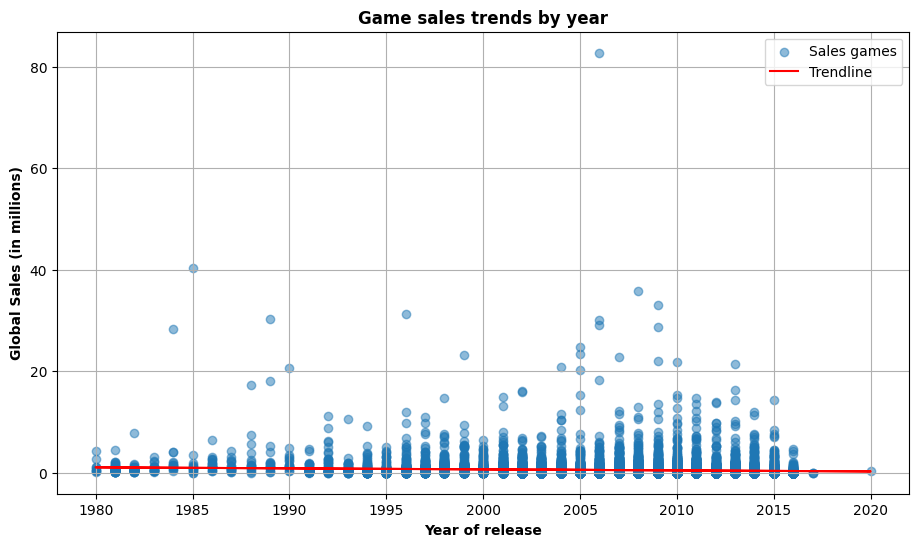

In [33]:

plt.figure(figsize=(11, 6))
plt.scatter(df['Year'], df['Global_Sales'], alpha=0.5, label="Sales games")
z = np.polyfit(df['Year'], df['Global_Sales'], 1)  # Linear model
p = np.poly1d(z)  # Creating a polynomial function
plt.plot(df['Year'], p(df['Year']), color='red', label="Trendline")  #Plot trendline
plt.xlabel("Year of release" , fontweight = 'bold' , fontsize = 10)
plt.ylabel("Global Sales (in millions)" , fontweight = 'bold' , fontsize = 10)
plt.title("Game sales trends by year" , fontweight = 'bold' , fontsize = 12 )
plt.legend()
plt.grid()
plt.show()

# Diagram output
**1. Growth and sales peak**

- Sales of video games have been growing since the 1980s, peaking in 2005–2010.

- This may be due to the popularity of consoles such as the `PlayStation 2` , `Xbox 360` , and `Nintendo Wii` .

**2. Decrease after 2010**

- Sales have been gradually declining since 2010.

- Possible reasons may include the transition to digital distribution (Steam, PlayStation Store, Xbox Live), and the decline in popularity of physical copies.

**3. Trendline**
   
- Throughout the chart, the trend line remains horizontal almost always, which may indicate low selling.

**4. Data Scatter**
   
- The diagram shows that there are individual hits that have exceeded 20 million sales.

- This confirms the rule that the gaming industry depends on blockbusters (GTA, etc.)

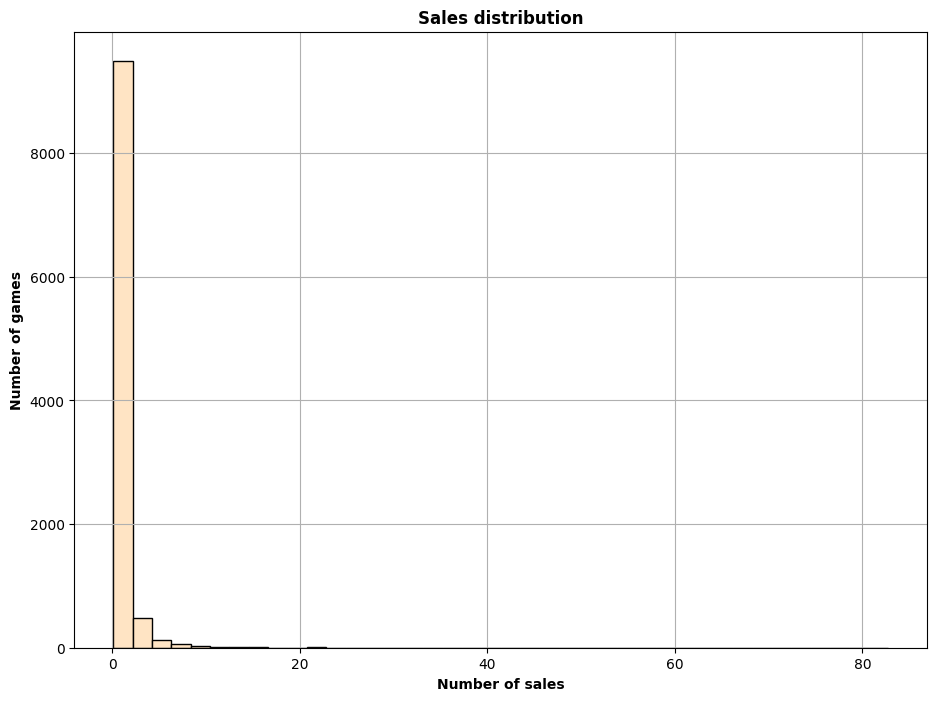

In [32]:
df_filtered = df[df['Global_Sales'] > 0.1]
plt.figure(figsize=(11,8))
plt.hist(df_filtered['Global_Sales'], bins=40 , edgecolor = 'black' , color = 'bisque')
plt.xlabel("Number of sales" , fontweight = 'bold' , fontsize = 10)
plt.ylabel("Number of games", fontweight = 'bold' , fontsize = 10)
plt.title("Sales distribution" , fontweight = 'bold' , fontsize = 12)
plt.grid()
plt.show()

# Diagram output
**1. Most games have low sales**

- The bulk of games are sold in small quantities (less than 1 million copies).

- This suggests that the gaming industry is heavily focused on hits, and most projects remain niche.

**2. The distribution has a pronounced right tail**

- There are a small number of games with very high sales (10+ million copies).

- These games are hits that bring the bulk of the industry's profits.

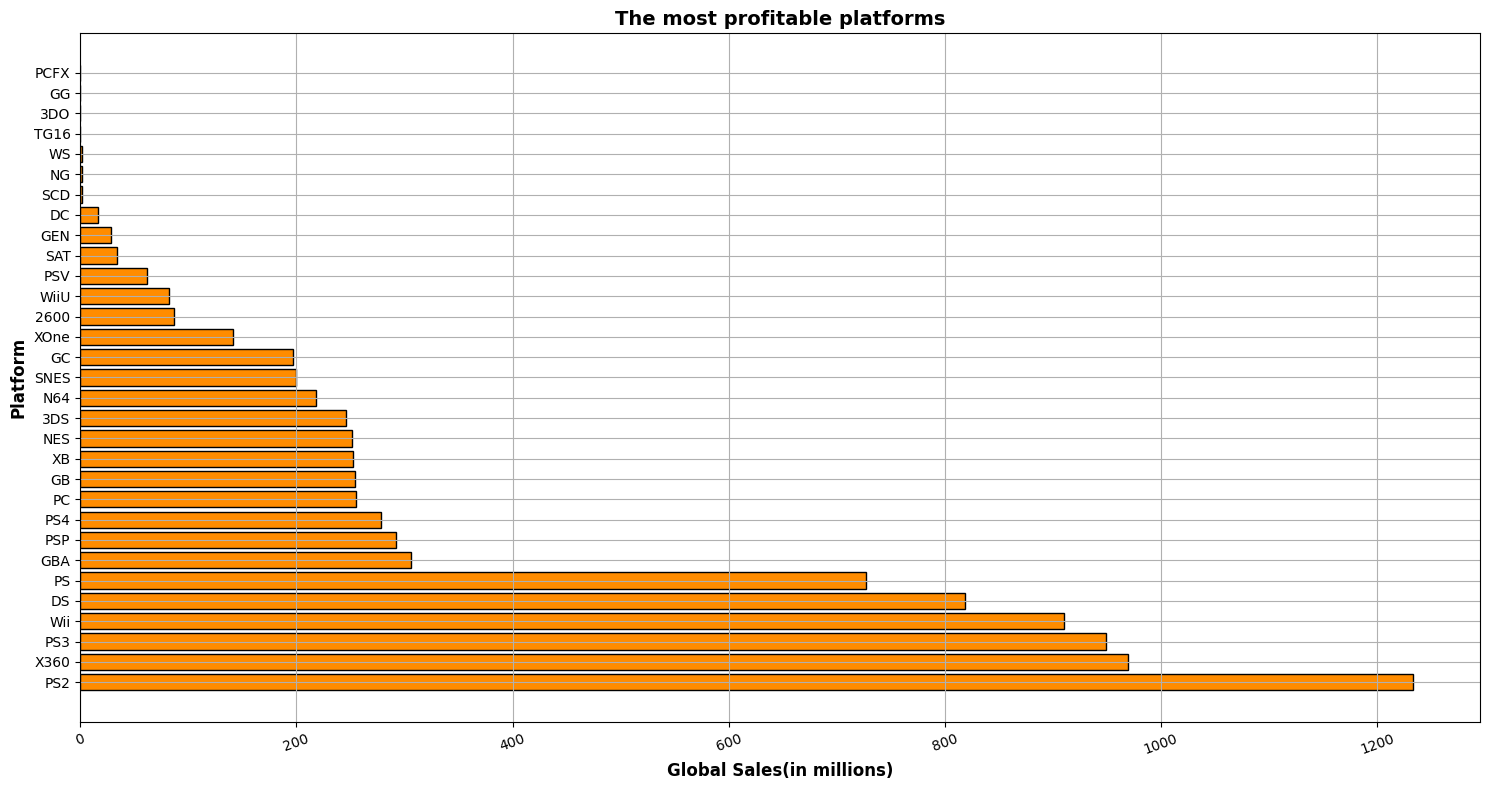

In [24]:

platform_sales_plot = platform_sales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,8))
plt.barh(platform_sales_plot.index , platform_sales_plot.values , edgecolor = 'black' , color = 'darkorange')
plt.xlabel('Global Sales(in millions)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Platform' , fontsize = 12 , fontweight = 'bold')
plt.title('The most profitable platforms' , fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

# Diagram output:
**1. Quick review**

- The bar chart show the most profitable platforms in dataset by global sales.

**2. Key conclusions**

- Market Leaders: `PS2` , `X360` , `PS3`  and `Wii` are the most profitable platforms, each exceeding 800 million units sold.

- Console Dominance: The top is dominated by consoles rather than PC , which means dominance of console gaming in the industry

- Gradual Decline: After top-5 there is sharp drop which means that there exist large success difference between the leaders and less popular platforms

  

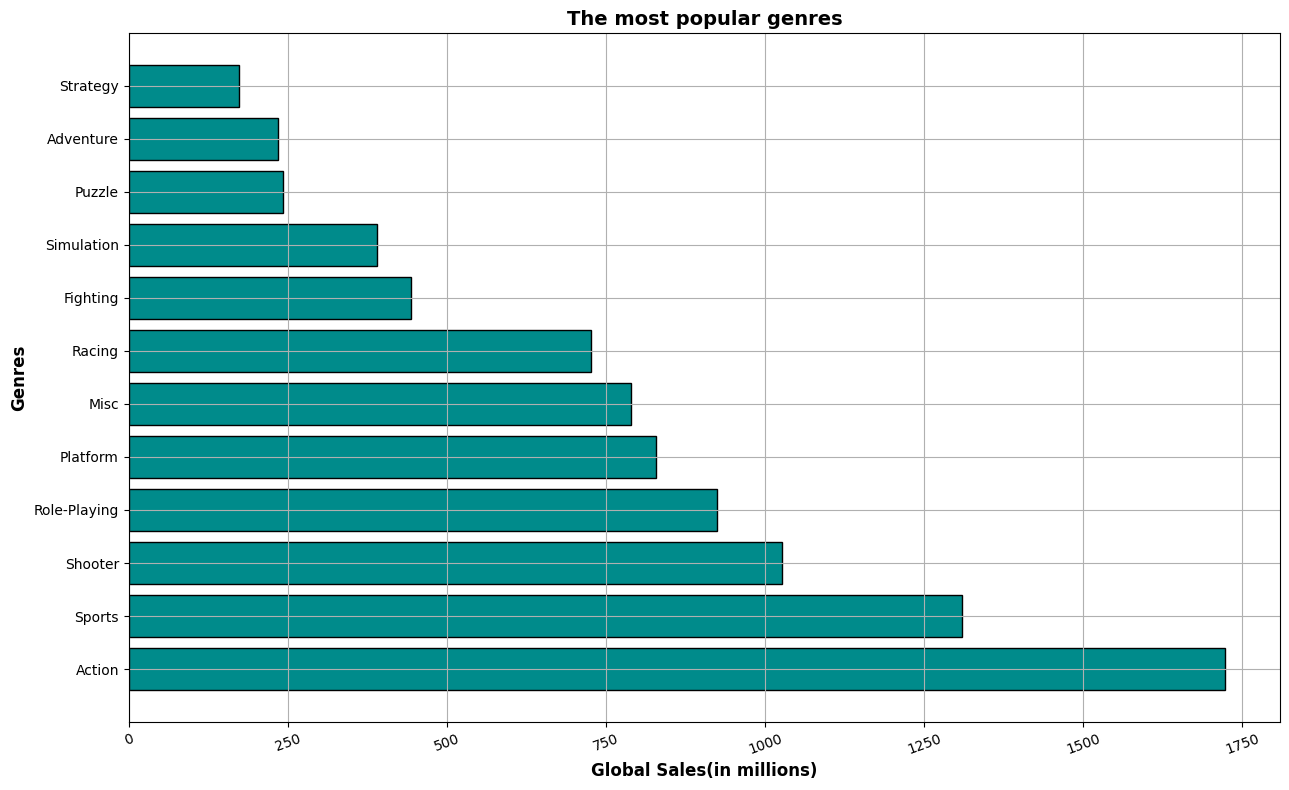

In [29]:
genre_sales_plot = genre_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(13,8))
plt.barh(genre_sales_plot.index , genre_sales_plot.values , edgecolor = 'black' , color = 'darkcyan')
plt.xlabel('Global Sales(in millions)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Genres' , fontsize = 12 , fontweight = 'bold')
plt.title('The most popular genres' , fontsize = 14 , fontweight = 'bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

# Diagram output
**1. Review**

- The bar chart show the most profitable genres in dataset by global sales.

**2. Conclusion by the diagram**

- The top sellers are the `Action` and `Sports` genres. These two genres are significantly ahead of the others in terms of global sales, which indicates high popularity among a wide audience.

- `Shooter` and `Role-Playing` are also very strong, occupying stable positions among the top genres

- The least popular genres are `Strategy` and `Adventure` , most likely because these are games that require brainpower, and such games are usually less popular. Usually, the greatest demand is for games that allow you to relax and have fun.

- The diagram also shows that after the top 5 genres there is a gradual decrease in interest/profitability, which may indicate stable demand.


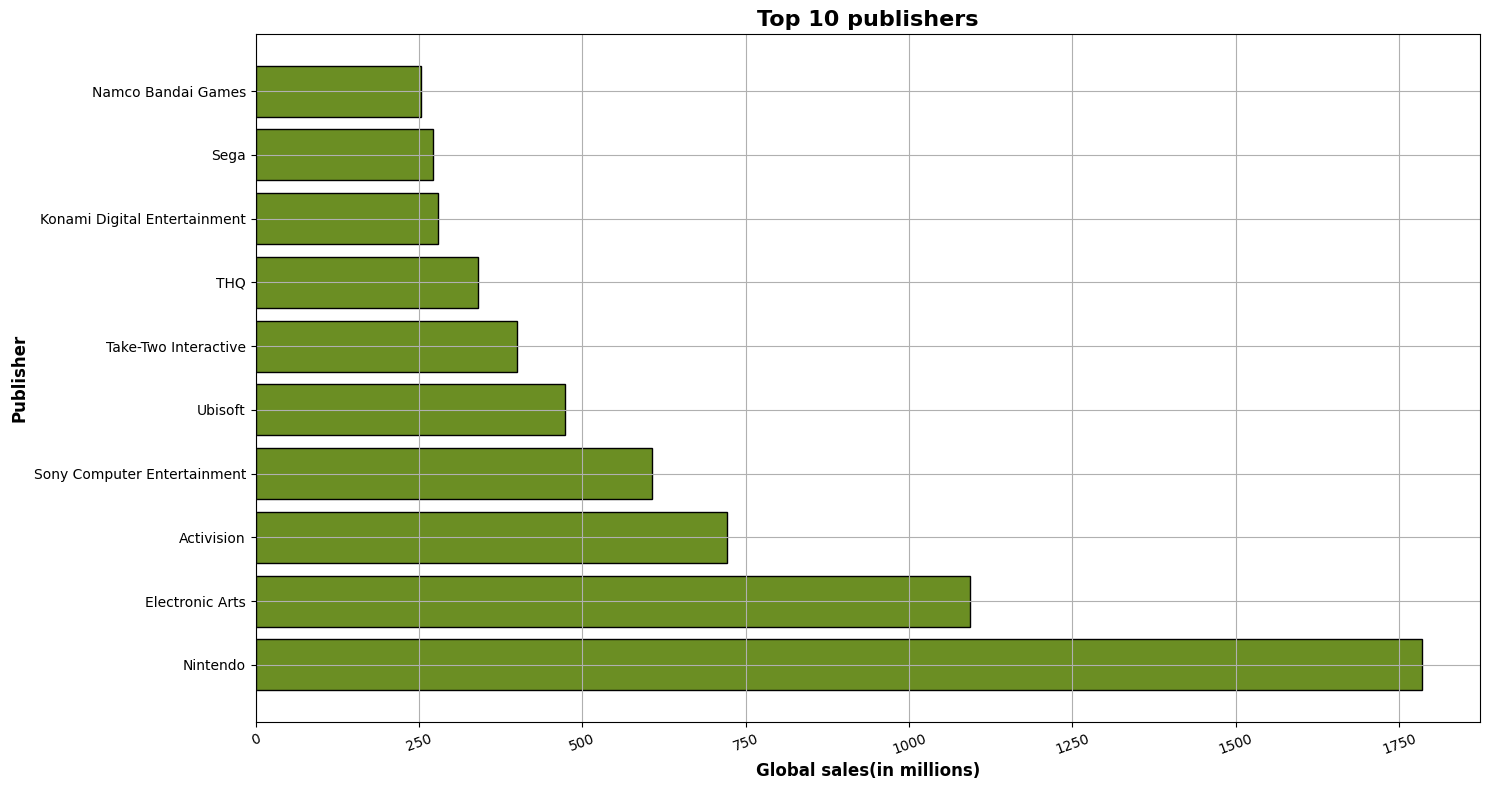

In [30]:
top10_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10) #For every publisher sum him with Global_Sales then  
plt.figure(figsize=(15,8))
plt.barh(top10_publishers.index , top10_publishers.values , edgecolor = 'black' , color= 'olivedrab')
plt.xlabel('Global sales(in millions)' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Publisher' , fontsize = 12 , fontweight = 'bold')
plt.title('Top 10 publishers' , fontsize = 16 , fontweight = 'bold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.grid()
plt.show()

# Diagram output
**1. Quick diagram review**
-  `Nintendo` is a clear leader. Its sales significantly exceed other publishers. This speaks to a strong portfolio of games and strong brand loyalty

- `Electronic Arts` and `Activision` are second and third, and are known for their big franchises such as _FIFA, Battlefield, and Call of Duty._

- `Sony Computer Entertainment` is also at a high level, reflecting the popularity of PlayStation exclusives.

-  Publishers `Ubisoft` , `Take-Two Interactive` , `THQ` occupy the middle of the top. They have successful game series like _Assassin’s Creed_ , _GTA_ , _Red Dead Redemption_.

-  The last places in the top are occupied by `Konami` , `Sega`  and `Namco Bandai Games` - they have good positions, but are noticeably inferior to the leaders.

**2. General diagram conclusions**

- The video game market is concentrated in the hands of a few giants.

- `Nintendo` is in a unique position in the market with its own hardware and franchises (_Mario, Zelda, Pokémon_)

-  Also analyze which genres are most common among these top publishers - this will give you even more insight into the market.

<Figure size 1400x800 with 0 Axes>

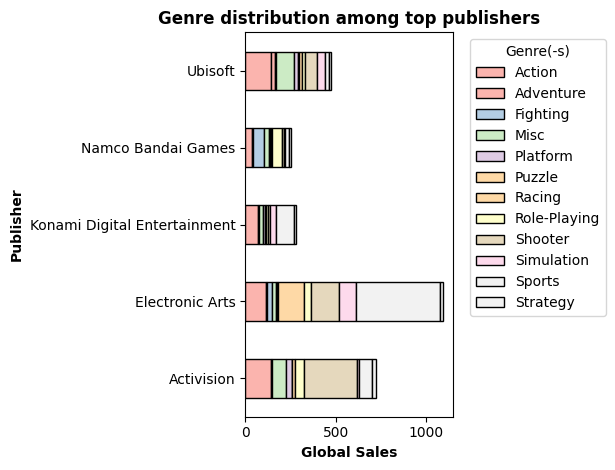

In [31]:
top_publishers = df['Publisher'].value_counts().head(5).index #Creating a varibble which output top 5 publishers in dataset like a list
df_filtered = df[df['Publisher'].isin(top_publishers)] #Filter dataset and only left rows which contain Publisher in top_publishers
genre_publisher_sales = df_filtered.groupby(['Publisher' , 'Genre'])['Global_Sales'].sum().unstack().fillna(0) #Grouping Genre and Publisher column , after grouping Global_Sales will be only outpuut, then use sum() to find sum of Global_Sales for every Genre-Puiblisher pair 
plt.figure(figsize=(14, 8))
genre_publisher_sales.plot(kind='barh', stacked=True, colormap='Pastel1', edgecolor='black')
plt.xlabel('Global Sales' , fontsize = 10 , fontweight = 'bold')
plt.ylabel('Publisher' , fontsize = 10 , fontweight = 'bold')
plt.title('Genre distribution among top publishers' , fontsize = 12 , fontweight = 'bold')
plt.legend(title='Genre(-s)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Diagram output
**1. Electronic Arts (EA) is the leader in global sales:**

- EA has the largest volume of global sales among all publishers.

- The main contribution is made by the genres: `Sports`, `Simulation`, `Shooter` and `Racing`.

- The large contribution of sports games (series like _FIFA, Madden,_ etc.) is especially noticeable.

**2. Activision is the second in sales:**

- The `Shooter` genre clearly dominates (probably due to the _Call of Duty series_).

- Sale in the `Action` , `Sports` , `Strategy` and `Simulation` genres is also noticeable

**3. Ubisoft balanced strategy:**

-  Sales are spread across many genres, with no one genre clearly dominating.

- `Action` , `Adventure` , `Shooter` , `Platform` , `Misc` and `Role-Playing` are well represented.

**4. Namco Bandai Games — less diverse, but active in niches:**

- The main contribution comes from `Fighting` ,`Role-Playing` and `Platform`.

- This reflects their specialization in the Eastern market (games like _Tekken, Dragon Ball, JRPG_).


**5. Konami Digital Entertainment is the least represented by volume:**

- Sales are relatively modest, but notable in `Sports` , `Simulation` , `Action` and `Fighting` .

- Probably reflects niche franchises like _PES, Metal Gear,_ etc

## General trends:

- The most profitable genres are : `Sports` , `Shooter` , `Action`
  
- Publishers with a narrow specialization (like _Konami_ or _Namco_) are inferior in volume to multi-genre giants (_EA_, _Activision_).

- Ubisoft uses an "all-out" strategy, but falls short of the leaders in scale.


<div style="border: 2px solid #333; padding: 15px; border-radius: 10px">
    
# Conclusions and recommendations


### 1. General Trends by Genres, Platforms and Regions :

 **1. Genres:**

- `Action`and `Shooter` dominate sales - important for both casual and hardcore gamers.

- `Sports` are popular due to franchises like _FIFA_ and _Madden_.

 **2. Platforms:**

- `Nintendo` consoles are particularly successful among the masses, particularly the `Wii` and `DS`.

- `Sony` and `Microsoft` hold a more “hardcore” audience.

 **3. Regions:**

- In `North America`, consoles and genres like `Shooter` and `Sports` are most popular.

- In `Japan`, RPGs and platformers are the most popular, especially on handheld devices

### 2. Peculiarities of Market Behavior by Years:

- From 2005 to 2010 there was a sharp growth - the boom of new platforms and casual gameplay.

- After 2012, the market began to stabilize, due to the transition to digital distribution (which is not in this dataset).

- Certain genres have “spikes” - for example, the rise in popularity of platformers in 2006-2008 (possibly due to the Wii).

- Platforms change over time, it is important to keep track of the life cycle of consoles.

### 3. Conclusions :

- The video game market has been growing steadily, but sales peaked in 2008–2010.

- The `PS2`, `Xbox 360`, `Wii` and `DS` platforms were the leaders in total sales, reflecting the dominance of the consoles at the time.

- The `Action`, `Sports` and `Shooter` genres hold a large share of the market, reflecting the massive demand for dynamic gameplay

- The leading publishers are `Nintendo`, `EA`, `Activision`, with each emphasizing their key genres.

- The main market is North America(`NA_Sales`), followed by Europe(`EU_Sales`) and Japan(`JP_Sales`)

### 4. Practical Advice for Developers, Publishers and Investors:

 **1. For developers:**
 
- Focus on the `Action`, `Sports` and `Shooter` genres - they generate the most revenue.

- Take into account regional preferences: for example, RPGs will do better in `Japan` than in the `US`.

 **2. For publishers:**

- Choose platforms with an active user base. New console launches are a window of opportunity.

- Leverage brand recognition: franchises and sequels bring steady sales.

**3. For investors:**

- Invest in publishers with strong portfolios across multiple genres (e.g.`EA`, `Nintendo`).

- Look out for developers who can adapt to new platforms and trends.

</div>